In [1]:
import pandas as pd
#load dataset of student portuguese scores
d = pd.read_csv('dataset/student-por.csv', sep=';')

In [2]:
#generate binary label (pass/fail) based on G1+G2+G3 (test grades, each 0-20 pts); threshold for passing is sum>=30
d['pass'] = d.apply(lambda row: 1 if(row['G1'] + row['G2']+ row['G3']) >= 35 else 0, axis=1)


In [3]:
#drop periods marks column
d = d.drop(['G1', 'G2', 'G3'], axis=1)

In [4]:
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [5]:
#one-hot encoding on categorical columns
d = pd.get_dummies(d, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                               'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                               'nursery', 'higher', 'internet', 'romantic'])


In [6]:
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [9]:
#shuffle rows
d = d.sample(frac=1)

#split training and testing data
d_train= d[:500]
d_test = d[500:]

#drop the pass result from train data and save it to other variable
d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

#drop the pass result from test data and save it to other variable
d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

#drop the pass result from loaded dataset and save it to other variable
d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

In [10]:
#number of passing students in whole dataset:
import numpy as np
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

Passing: 328 out of 649 (50.54%)


In [13]:
#fit a decision tree of max depth 5
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t = t.fit(d_train_att, d_train_pass)


In [14]:
# save tree
tree.export_graphviz(t, out_file="student-performance.dot", label="all", impurity=False,
                    proportion=True, feature_names=list(d_train_att), class_names=["fail","pass"],
                    filled=True, rounded=True)

In [15]:
# check the tree score on test dataset
print(t.score(d_test_att, d_test_pass))

0.6040268456375839


In [20]:
##############Check the tree model accuracy for most depth (by example in range 1 to 19)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(t, d_att, d_pass, cv=5)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))


Accuracy: 0.68 (+/- 0.08)


In [23]:
# use different max-depth (1 to 20) for cross validation to evaluate precision
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    #show average score and +/- two standard deviations away (covering 95% of scores) of each max depth
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))
#We see that better accuracies than the average we got are for max_depths 3 and 4 

Max depth: 1, Accuracy: 0.64 (+/- 0.05)
Max depth: 2, Accuracy: 0.69 (+/- 0.06)
Max depth: 3, Accuracy: 0.69 (+/- 0.07)
Max depth: 4, Accuracy: 0.70 (+/- 0.06)
Max depth: 5, Accuracy: 0.68 (+/- 0.08)
Max depth: 6, Accuracy: 0.66 (+/- 0.07)
Max depth: 7, Accuracy: 0.68 (+/- 0.07)
Max depth: 8, Accuracy: 0.66 (+/- 0.02)
Max depth: 9, Accuracy: 0.68 (+/- 0.07)
Max depth: 10, Accuracy: 0.66 (+/- 0.03)
Max depth: 11, Accuracy: 0.63 (+/- 0.05)
Max depth: 12, Accuracy: 0.64 (+/- 0.02)
Max depth: 13, Accuracy: 0.65 (+/- 0.03)
Max depth: 14, Accuracy: 0.64 (+/- 0.03)
Max depth: 15, Accuracy: 0.63 (+/- 0.02)
Max depth: 16, Accuracy: 0.62 (+/- 0.05)
Max depth: 17, Accuracy: 0.64 (+/- 0.06)
Max depth: 18, Accuracy: 0.62 (+/- 0.02)
Max depth: 19, Accuracy: 0.64 (+/- 0.06)


In [24]:
#Show data for max_depth(1 to 20) accuracies chart
depth_acc = np.empty((19, 3), float)
i = 0
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i, 0] = max_depth
    depth_acc[i, 1] = scores.mean()
    depth_acc[i, 2] = scores.std()*2
    i+=1
depth_acc

array([[ 1.        ,  0.63792487,  0.05180848],
       [ 2.        ,  0.68725104,  0.0642483 ],
       [ 3.        ,  0.69037567,  0.06988363],
       [ 4.        ,  0.69650566,  0.05953321],
       [ 5.        ,  0.68578414,  0.07848751],
       [ 6.        ,  0.66250447,  0.04768553],
       [ 7.        ,  0.6749195 ,  0.05875966],
       [ 8.        ,  0.65946333,  0.04096787],
       [ 9.        ,  0.65794872,  0.04582217],
       [10.        ,  0.6394514 ,  0.05071381],
       [11.        ,  0.63642218,  0.04324076],
       [12.        ,  0.66098986,  0.04433764],
       [13.        ,  0.65338104,  0.04886654],
       [14.        ,  0.64104949,  0.04948067],
       [15.        ,  0.64258795,  0.06521635],
       [16.        ,  0.63484794,  0.03616067],
       [17.        ,  0.63175909,  0.03198965],
       [18.        ,  0.6394037 ,  0.03467571],
       [19.        ,  0.6487418 ,  0.04882369]])

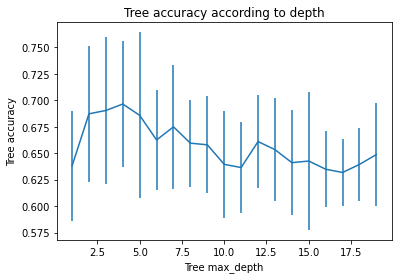

In [26]:
#show chart with error bars for each max_depth
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
ax.set_xlabel("Tree max_depth")
ax.set_ylabel("Tree accuracy")
ax.set_title("Tree accuracy according to depth")
plt.show()

In [ ]:
#We conclude that max_depth more than 4 doesnt necessarily increase the tree accuracy